<a href="https://colab.research.google.com/github/AjayPratapSingh823/30-days-of-backend/blob/main/LLM%26Linear%26Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Accessing OpenAI LLM through APIs

In [3]:
!pip install OpenAI
!pip install LangChain
!pip install langchain_community
!pip install Cohere

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 52.7 MB/s eta 0:00:00


In [13]:
import os


import warnings
warnings.filterwarnings('ignore')

In [8]:
!pip install langchain-cohere

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.9 MB/s eta 0:00:00


In [16]:
from langchain.llms import Cohere
os.environ['COHERE_API_KEY']='zQpvDLSOWOwXq4Qhu8Zg1axArZntqrE3K0GXhzfL'
llm = Cohere()
print(llm.invoke("how many hours should we sleep"))


 According to the Centers for Disease Control and Prevention, it is recommended that adults aged 18-60 years old should get 7-9 hours of sleep every night for optimal health. However, there are several factors that influence the amount of sleep needed, including the unique demands of the body, lifestyle, and health. 

Some people may find that they feel well-rested and energized with 7 hours of sleep, while others may need closer to 9 hours to function at their best. It is important to pay attention to your individual sleep needs and adjust your sleep schedule accordingly.

Additionally, the quality of sleep also plays an essential role; it is possible to achieve satisfactory sleep through efficient sleep scheduling, maintaining a pleasant sleep environment, and cultivating healthy sleep habits. 


In [18]:
print(llm.invoke("What is the sentiment of this review. Give one word answer Pos or Neg - The staff was friendly and helpful. I had a great experience with my loan officer."))

 Pos


In [21]:
list=[
    "INFO : Server started successfully",
    "Warning : Low disk spacce",
    "CRITICAL : database connection failed",
    "Critical : Security breach detected",
    "INFO : New feature released",
]
df=pd.DataFrame(list,columns=["Message"])
print(df)

                                 Message
0     INFO : Server started successfully
1              Warning : Low disk spacce
2  CRITICAL : database connection failed
3    Critical : Security breach detected
4            INFO : New feature released


In [23]:
df["Sentiment"] = df["Message"].apply(lambda message: llm.invoke(f"Classify the severity of this log message make give output as CRITICAL if the message is critical: {message}"))
df

,Message,Sentiment
0,INFO : Server started successfully,INFO
1,Warning : Low disk spacce,"The severity of the log message ""Warning: Low..."
2,CRITICAL : database connection failed,The severity of the log message is critical. ...
3,Critical : Security breach detected,CRITICAL
4,INFO : New feature released,The severity of the log message is `INFO`. Th...


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Message    5 non-null      object
 1   Sentiment  5 non-null      object
dtypes: object(2)
memory usage: 212.0+ bytes


In [27]:
import statsmodels

In [29]:
air=pd.read_csv("https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/AirPassengers/AirPassengers.csv")
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Week_num                      80 non-null     int64  
 1   Passengers                    80 non-null     int64  
 2   Promotion_Budget              80 non-null     int64  
 3   Service_Quality_Score         80 non-null     float64
 4   Holiday_week                  80 non-null     object 
 5   Delayed_Cancelled_flight_ind  80 non-null     object 
 6   Inter_metro_flight_ratio      80 non-null     float64
 7   Bad_Weather_Ind               80 non-null     object 
 8   Technical_issues_ind          80 non-null     object 
dtypes: float64(2), int64(3), object(4)
memory usage: 5.8+ KB


Corealtion coefficent - It define the strength of dependents variables. the value lies btweeen [-1,0,1] if value is near zero then variable low dependent and if value is near -1 or 1 then variable is highly dependent

In [32]:
np.corrcoef(air.Passengers, air.Promotion_Budget)

array([[1.        , 0.96585103],
       [0.96585103, 1.        ]])

In [37]:
import statsmodels.formula.api as sm
model=sm.ols(formula='Passengers ~ Promotion_Budget',data=air)
fitted1=model.fit()
print(fitted1.summary())

                            OLS Regression Results                            
Dep. Variable:             Passengers   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     1084.
Date:                Mon, 09 Jun 2025   Prob (F-statistic):           1.66e-47
Time:                        08:12:01   Log-Likelihood:                -751.34
No. Observations:                  80   AIC:                             1507.
Df Residuals:                      78   BIC:                             1511.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1259.6058   1361.071  

the regression line equation is y =B0x+B1 where B0 is Intercept Coef and B1 is Promotional_Budget. So the above code is used to find B0 and B1 to find exact value of Passengers affected by Promotional  Budget
y=No. of passengers
x=Promotional_Budget

# **R Squared**
R squared value define the goodness of the model.

In [38]:
import statsmodels.formula.api as sm
models=sm.ols(formula='Passengers ~ Inter_metro_flight_ratio',data=air)
fitted2=model.fit()
print(fitted2.summary())


                            OLS Regression Results                            
Dep. Variable:             Passengers   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     1084.
Date:                Mon, 09 Jun 2025   Prob (F-statistic):           1.66e-47
Time:                        08:17:28   Log-Likelihood:                -751.34
No. Observations:                  80   AIC:                             1507.
Df Residuals:                      78   BIC:                             1511.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1259.6058   1361.071  

In [40]:
models=sm.ols('Passengers ~ Promotion_Budget + Service_Quality_Score + Inter_metro_flight_ratio',data=air)
fitted=models.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:             Passengers   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     495.6
Date:                Mon, 09 Jun 2025   Prob (F-statistic):           8.71e-50
Time:                        08:21:02   Log-Likelihood:                -738.45
No. Observations:                  80   AIC:                             1485.
Df Residuals:                      76   BIC:                             1494.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

# Linear Regression With SK-Learn

In [42]:
sales=pd.read_csv("https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/Product%20Sales%20Data/Product_sales.csv")
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     467 non-null    int64
 1   Bought  467 non-null    int64
dtypes: int64(2)
memory usage: 7.4 KB


In [46]:
import sklearn as sk
from sklearn import linear_model

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(sales[["Age"]],sales["Bought"])
print("intercept",lr.intercept_)
print("intercept",lr.coef_)

intercept -0.17041246860379577
intercept [0.02094213]


In [69]:
d2=pd.DataFrame({"Age":[40]})
predict1=lr.predict(d2)
print(predict1)

[0.66727279]


## **Drawing Linear Regression Line**

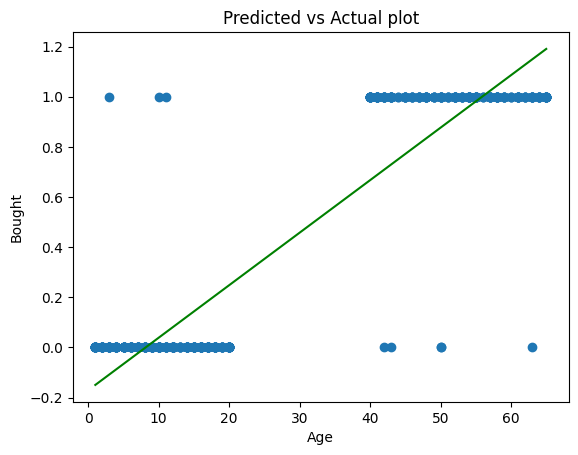

In [59]:
new_data=sales.drop(['Bought'],axis=1)
new_data["pred_value"]=lr.predict(new_data)
new_data["Actual"]=sales["Bought"]

#sort the data and draw the graph
new_data=new_data.sort_values(["pred_value"])
plt.scatter(new_data["Age"],new_data["Actual"])
plt.plot(new_data["Age"],new_data["pred_value"],color='green')
#Add label
plt.title('Predicted vs Actual plot')
plt.xlabel('Age')
plt.ylabel('Bought')
plt.show()

# **Logistic Regression**

In [62]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(sales[['Age']],sales[['Bought']])
print(logistic.intercept_)
print(logistic.coef_)

[-6.90722429]
[[0.21777169]]


In [70]:

predict_age1=logistic.predict(d2)
print(predict_age1)

[1]


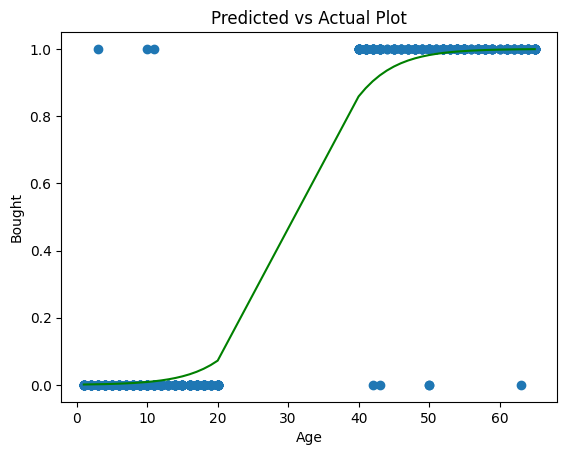

In [74]:
new_data=sales.drop(["Bought"],axis=1)

new_data["pred_values"]=logistic.predict_proba(new_data)[:,1]
new_data["Actual"]=sales["Bought"]

#Sort the data and draw the graph
new_data=new_data.sort_values(["pred_values"])
plt.scatter(new_data["Age"], new_data["Actual"])
plt.plot(new_data["Age"], new_data["pred_values"], color='green')
#Add lables and title
plt.title('Predicted vs Actual Plot')
plt.xlabel('Age')
plt.ylabel('Bought')
plt.show()

# **Confustion Matrix**
Confusion Matrix is used to define the accuracy of logistic model. It is a matrix  between yact and ypred value.


In [82]:
Fiber=pd.read_csv("https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/Fiberbits/Fiberbits_v1.csv")
Fiber.info()
print(Fiber['relocated'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   active_cust                 100000 non-null  int64
 1   income                      100000 non-null  int64
 2   months_on_network           100000 non-null  int64
 3   Num_complaints              100000 non-null  int64
 4   number_plan_changes         100000 non-null  int64
 5   relocated                   100000 non-null  int64
 6   monthly_bill                100000 non-null  int64
 7   technical_issues_per_month  100000 non-null  int64
 8   Speed_test_result           100000 non-null  int64
dtypes: int64(9)
memory usage: 6.9 MB
0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: relocated, Length: 100000, dtype: int64


In [75]:
from sklearn.metrics import confusion_matrix

In [86]:
###fitting logistic regression for active customer on rest of the variables#######
logistic.fit(Fiber[["income"]+['months_on_network']+['Num_complaints']+['number_plan_changes']+['relocated']+['monthly_bill']+['technical_issues_per_month']+['Speed_test_result']],Fiber[['active_cust']])

LogisticRegression()

In [87]:
predict1=logistic.predict(Fiber[["income"]+['months_on_network']+['Num_complaints']+['number_plan_changes']+['relocated']+['monthly_bill']+['technical_issues_per_month']+['Speed_test_result']])
predict1

cm1 = confusion_matrix(Fiber[['active_cust']],predict1)
print(cm1)

[[33852  8289]
 [ 6143 51716]]


In [89]:
print("col sums", sum(cm1))
total1=sum(sum(cm1))
print("Total", total1)

col sums [39995 60005]
Total 100000


In [90]:
accuracy1=(cm1[0,0]+cm1[1,1])/total1
accuracy1

np.float64(0.85568)